In [1]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import matplotlib as mpl
import pandas as pd
import matplotlib.cm as cm
import pickle
from tqdm import tqdm
import os
from scipy.special import softmax
from sklearn.metrics import accuracy_score
from cairosvg import svg2png

In [2]:
from metamod.utils import ResultsManager, single_task_plot, task_switch_plot, cat_assimilation_plot, task_engagement_plot, \
    load_single_layer_vars, single_neuron_param_plot, SingleLayerManager, single_neuron_baseline_plot, class_prop_plot, \
    task_modulation_plot, plot_maml_results, plot_optimal_lr, two_layer_parameters_plot
plt.rcParams['text.usetex'] = True

## No cost gain modulation results

{'learning_rate': 0.005, 'hidden_dim': 50, 'intrinsic_noise': 0.0, 'reg_coef': 0.01, 'W1_0': None, 'W2_0': None, 'input_dim': 26, 'output_dim': 2, 'model': <metamod.networks.linear_net.LinearNet object at 0x7faa269cd330>}


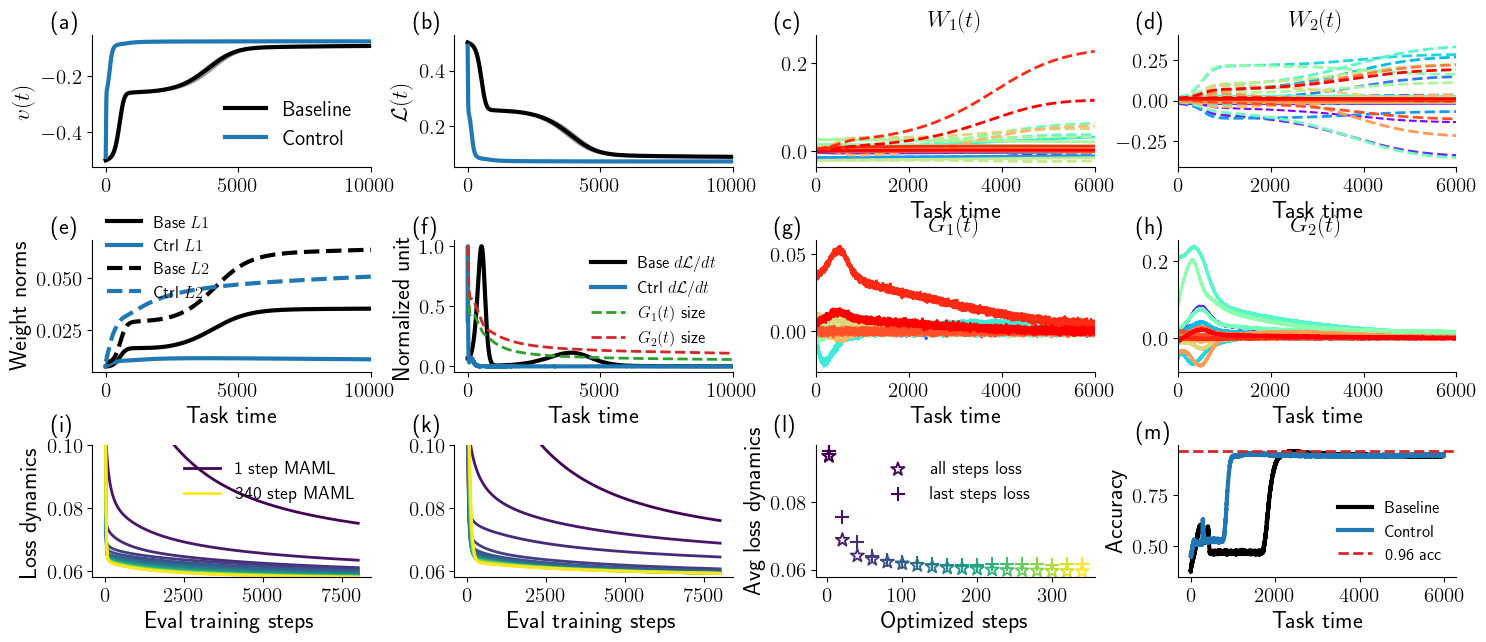

In [22]:
np.random.seed(0)
mnist_dir_list = glob.glob("../results/single_task_no_cost/run_id_*_MNIST*")
results = []
for result_dir in mnist_dir_list:
    results.append(ResultsManager(result_dir))

figsize = np.array((16, 8/5*4))*1.1
fontsize = 17
reduce_fontsize = 5
# weight_norm_ylim = (0, 0.1)
weight_legend_pos = (0, 1.3)

f = plt.figure(figsize=figsize)
hspace = 0.55
gs = mpl.gridspec.GridSpec(3, 4, wspace=0.3, hspace=hspace) 

ax_0 = f.add_subplot(gs[0, 0])  
ax_1 = f.add_subplot(gs[0, 1])  
ax_2 = f.add_subplot(gs[1, 0])  
ax_3 = f.add_subplot(gs[1, 1])
ax0 = f.add_subplot(gs[0, 2])  # full first row
ax1 = f.add_subplot(gs[0, 3])
ax2 = f.add_subplot(gs[1, 2])  # second row, first col
ax3 = f.add_subplot(gs[1, 3])

ax_maml = np.array([f.add_subplot(gs[2, i]) for i in range(3)])
ax_acc = f.add_subplot(gs[2, 3])

# ax_diagram1 = f.add_subplot(gs[3, :2])
# ax_diagram2 = f.add_subplot(gs[3, 2:])

ax = np.array([ax_0, ax_1, ax_2, ax_3])

subplot_labels = np.array([["(a)", "(b)"], ["(e)", "(f)"]])
subplot_labels = subplot_labels.flatten()

ax = single_task_plot(results, ax=ax, fontsize=fontsize, line_width=3, x_lim=(-500, 10000), 
                      skip_xlabel=True, label_in_title=False, subplot_labels=subplot_labels,
                      reduce_fontsize=reduce_fontsize, weight_legend_pos=weight_legend_pos)

results_path = "../results/single_task_no_cost/run_id_0_MNIST_05-08-2023_22-44-11-966"
result_manager = ResultsManager(results_path)
print(result_manager.params["model_params"])
ax_2 = np.array([ax0, ax1, ax2, ax3])

figsize = (16, 6/5*2)
fontsize = 17
line_width = 2
n_weights = 20
subplot_labels = np.array([["(c)", "(d)"], ["(g)", "(h)"]])
subplot_labels = subplot_labels.flatten()
xlim = (0, 6000)

ax_2 = two_layer_parameters_plot(result_manager, figsize=figsize, fontsize=fontsize, line_width=line_width, 
                                 n_weights=n_weights, subplot_labels=subplot_labels, xlim=xlim, ax=ax_2)

pre_processed_maml = pd.read_pickle("pre_process_maml/all_time_steps.pkl")
pre_processed_maml_last_step = pd.read_pickle("pre_process_maml/last_time_step.pkl")

fontsize = 17
weight_legend_pos = (0.25, 0.6)
subplot_labels = np.array(["(i)", "(k)", "(l)"])

dynamic_comparison_maml(ax=ax_maml, maml_pre_processed=pre_processed_maml, maml_pre_processed_2=pre_processed_maml_last_step, 
                        fontsize=fontsize, min_variable_label="1 step MAML", max_variable_label="340 steps MAML", 
                        min_variable=1, max_variable=340, line_width=2, weight_legend_pos = weight_legend_pos, 
                        subplot_labels=subplot_labels, handletextpad=-0.5)


acc_dict = pd.read_pickle("accuracy_data.pkl")
base_acc_runs, control_acc_runs = acc_dict["base_acc"], acc_dict["control_acc"] 

acc_steps = np.arange(6000)
ax_acc.plot(acc_steps, np.mean(base_acc_runs, axis=0), color="k", lw=3, 
            label="Baseline")
ax_acc.plot(acc_steps, np.mean(control_acc_runs, axis=0), color="C0", lw=3, 
            label="Control")
ax_acc.axhline(np.amax(np.mean(base_acc_runs, axis=0)), linewidth=2,
               color="C3", linestyle="--", label="{0:.2f} acc".format(np.amax(np.mean(base_acc_runs, axis=0))))
ax_acc.set_xlabel("Task time", fontsize=fontsize)
ax_acc.set_ylabel("Accuracy", fontsize=fontsize)
ax_acc.legend(fontsize=fontsize - 5, frameon=False)
ax_acc.tick_params(axis='both', which='major', labelsize=fontsize - 2)
ax_acc.spines[['right', 'top']].set_visible(False)
ax_acc.text(-0.15, 1.05, "(m)", transform=ax_acc.transAxes,
              size=fontsize, weight='bold')

plt.savefig("paper_v2/rebuttal_fig1.pdf", bbox_inches="tight")

## All loss MAML vs approximated by last step

In [35]:
pre_processed_maml = pd.read_pickle("MAML_experiments/maml_pre_processed_masked.pkl")

array([<Axes: xlabel='Optimized steps', ylabel='MAML loss'>,
       <Axes: xlabel='Eval training steps', ylabel='Loss dynamics'>],
      dtype=object)

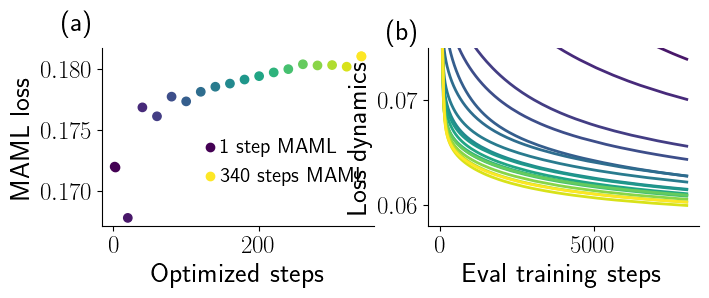

In [36]:
figsize = np.array((7, 3/5*3.5))*1.1
fontsize = 20
weight_legend_pos = (0.25, 0.6)
subplot_labels = np.array(["(a)", "(b)"])

f, ax = plt.subplots(1, 2, figsize=figsize)

ax1 = ax

plot_maml_results(ax=ax1, maml_pre_processed=pre_processed_maml, fontsize=fontsize, 
                  min_variable_label="1 step MAML", max_variable_label="340 steps MAML", min_variable=1, max_variable=340, line_width=2,
                  weight_legend_pos = weight_legend_pos, subplot_labels=subplot_labels, handletextpad=-0.5)

In [37]:
pre_processed_maml_last_step = pd.read_pickle("MAML_experiments/maml_pre_processed_laststep_masked.pkl")

array([<Axes: xlabel='Optimized steps', ylabel='MAML loss'>,
       <Axes: xlabel='Eval training steps', ylabel='Loss dynamics'>],
      dtype=object)

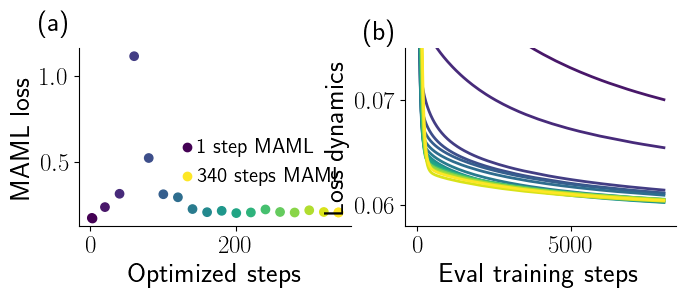

In [38]:
figsize = np.array((7, 3/5*3.5))*1.1
fontsize = 20
weight_legend_pos = (0.25, 0.6)
subplot_labels = np.array(["(a)", "(b)"])

f, ax = plt.subplots(1, 2, figsize=figsize)

ax1 = ax

plot_maml_results(ax=ax1, maml_pre_processed=pre_processed_maml_last_step, fontsize=fontsize, 
                  min_variable_label="1 step MAML", max_variable_label="340 steps MAML", min_variable=1, max_variable=340, line_width=2,
                  weight_legend_pos = weight_legend_pos, subplot_labels=subplot_labels, handletextpad=-0.5)

## Let's compare optimizing over last step or all of them, by averaging across tasks and runs

In [4]:
def loss_per_task(results, training=True):
    if training:
        loss, time_span = results["Loss_t_control_opt"], results["eval_time_span"]
    else:
        loss, time_span = results["Loss_t_control_opt_test"], results["eval_time_span"]
    return loss

def extract_single_run(f, results_path, run=0, **kwargs):
    skip_steps = 20
    n_runs = 10
    n_steps = np.arange(0, 341, skip_steps)
    n_steps[0] = 2
    step_quantity = []
    for step in n_steps:
        path = os.path.join(results_path, "MAML_sweep_run_"+str(run)+"_n_steps_"+str(step)+"_*")
        file_path = glob.glob(path)[0]
        results = pd.read_pickle(os.path.join(file_path, "results.pkl"))
        step_quantity.append(f(results, **kwargs))
    return np.stack(step_quantity, axis=0), n_steps

In [5]:
def pre_process_maml_runs(results_path, save_name):
    
    avg_per_task_loss_train = 0
    avg_per_task_loss_test = 0
    for run in range(10):
        per_task_loss, steps = extract_single_run(f=loss_per_task,
                                                  run=run,
                                                  results_path=results_path,
                                                  training=True)

        per_task_loss_test, steps = extract_single_run(f=loss_per_task, 
                                                       run=run,
                                                       results_path=results_path,
                                                       training=False)
        
        print(save_name)
        print(np.mean(per_task_loss), np.mean(per_task_loss_test))

        avg_per_task_loss_train += per_task_loss
        avg_per_task_loss_test += per_task_loss_test
        
    pickle.dump({"per_task_loss": avg_per_task_loss_train/10,
                 "per_task_loss_test": avg_per_task_loss_test/10,
                 "steps": steps},
                # open("maml_pre_processed.pkl", "wb"),
                # open("maml_pre_processed_masked.pkl", "wb"),
                open("pre_process_maml/"+save_name+".pkl", "wb"),
                protocol=pickle.HIGHEST_PROTOCOL)

In [18]:
results_path = "../results/hr_maml_sweep/"
pre_process_maml_runs(results_path, "all_time_steps")

all_time_steps
0.06436342 0.06310334
all_time_steps
0.06419171 0.06295684
all_time_steps
0.064337984 0.063082196
all_time_steps
0.06443326 0.063154995
all_time_steps
0.064233564 0.06298173
all_time_steps
0.06420151 0.0629737
all_time_steps
0.06417393 0.06292849
all_time_steps
0.06444118 0.063181534
all_time_steps
0.06438272 0.06311787
all_time_steps
0.064178795 0.06292231


In [19]:
results_path = "../results/hr_maml_sweep_masking/"
pre_process_maml_runs(results_path, "first_step_masked")

first_step_masked
0.068098456 0.066632815
first_step_masked
0.06808808 0.06664728
first_step_masked
0.068056084 0.066619046
first_step_masked
0.0681105 0.066659406
first_step_masked
0.068202846 0.06676626
first_step_masked
0.068176694 0.06669806
first_step_masked
0.06792675 0.06649479
first_step_masked
0.06810188 0.06663715
first_step_masked
0.06789942 0.066465564
first_step_masked
0.06810424 0.06668559


In [20]:
results_path = "../results/hr_maml_last_step_masking/"
pre_process_maml_runs(results_path, "last_time_step")

last_time_step
0.06601564 0.06486108
last_time_step
0.06603923 0.06487162
last_time_step
0.06582295 0.064656116
last_time_step
0.06622686 0.06502914
last_time_step
0.06589724 0.064716935
last_time_step
0.0661648 0.06498341
last_time_step
0.06609902 0.0649417
last_time_step
0.066016406 0.06486118
last_time_step
0.06595896 0.06479549
last_time_step
0.065922335 0.06475739


In [6]:
pre_processed_maml = pd.read_pickle("pre_process_maml/all_time_steps.pkl")
# pre_processed_maml = pd.read_pickle("pre_process_maml/first_step_masked.pkl")
pre_processed_maml_last_step = pd.read_pickle("pre_process_maml/last_time_step.pkl")

In [21]:
def dynamic_comparison_maml(ax, maml_pre_processed, maml_pre_processed_2, **plot_kwargs):
    fontsize = plot_kwargs["fontsize"]
    min_variable_label = plot_kwargs["min_variable_label"]
    max_variable_label = plot_kwargs["max_variable_label"]
    min_variable = plot_kwargs["min_variable"]
    max_variable = plot_kwargs["max_variable"]
    line_width = plot_kwargs["line_width"]
    subplot_labels = plot_kwargs["subplot_labels"]
    y_lim = []
    
    ax = ax.flatten()
    y_lim = [5.8 * 10 ** -2, 0.1]

    # MAML DYNAMICS CURVES
    per_task_loss = maml_pre_processed["per_task_loss_test"]
    colors = cm.viridis(np.linspace(0, 1, per_task_loss.shape[0]))
    steps = maml_pre_processed["steps"]
    for j, step in enumerate(steps):
        if j == 0:
            ax[0].plot(np.arange(per_task_loss.shape[-1]), np.mean(per_task_loss, axis=1)[j, :], color=colors[j],
                       lw=line_width, alpha=1, label="1 step MAML")
        elif j == len(steps) - 1:
            ax[0].plot(np.arange(per_task_loss.shape[-1]), np.mean(per_task_loss, axis=1)[j, :], color=colors[j],
                       lw=line_width, alpha=1, label="340 step MAML")#, label=variable_label+": "+str(max_variable))
        else:
            ax[0].plot(np.arange(per_task_loss.shape[-1]), np.mean(per_task_loss, axis=1)[j, :], color=colors[j],
                       lw=line_width, alpha=1)
        ax[0].set_ylim(y_lim)
    ax[0].tick_params(axis='both', which='major', labelsize=fontsize-2)
    ax[0].spines[['right', 'top']].set_visible(False)
    ax[0].set_xlabel("Eval training steps", fontsize=fontsize)
    ax[0].set_ylabel("Loss dynamics", fontsize=fontsize)
    ax[0].text(-0.15, 1.1, subplot_labels[0], transform=ax[0].transAxes,
                  size=fontsize, weight='bold')
    ax[0].legend(fontsize=fontsize - 4, frameon=False,
                     loc="upper right")

    per_task_loss = maml_pre_processed_2["per_task_loss_test"]
    colors = cm.viridis(np.linspace(0, 1, per_task_loss.shape[0]))
    steps = maml_pre_processed["steps"]
    for j, step in enumerate(steps):
        if j == 0:
            ax[1].plot(np.arange(per_task_loss.shape[-1]), np.mean(per_task_loss, axis=1)[j, :], color=colors[j],
                       lw=line_width, alpha=1)
        elif j == len(steps) - 1:
            ax[1].plot(np.arange(per_task_loss.shape[-1]), np.mean(per_task_loss, axis=1)[j, :], color=colors[j],
                       lw=line_width, alpha=1)#, label=variable_label+": "+str(max_variable))
        else:
            ax[1].plot(np.arange(per_task_loss.shape[-1]), np.mean(per_task_loss, axis=1)[j, :], color=colors[j],
                       lw=line_width, alpha=1)
        ax[1].set_ylim(y_lim)
    ax[1].tick_params(axis='both', which='major', labelsize=fontsize-2)
    ax[1].spines[['right', 'top']].set_visible(False)
    ax[1].set_xlabel("Eval training steps", fontsize=fontsize)
    # ax[1].set_ylabel("Loss dynamics", fontsize=fontsize)
    ax[1].text(-0.15, 1.1, subplot_labels[1], transform=ax[1].transAxes,
                  size=fontsize, weight='bold')

    per_task_loss = maml_pre_processed["per_task_loss_test"]
    per_task_loss2 = maml_pre_processed_2["per_task_loss_test"]
    marker_size = 100
    
    ax[2].scatter(steps[0], np.mean(per_task_loss, axis=(-1, -2))[0], color=colors[0,], label="all steps loss", marker="*",
                 s=marker_size, facecolors='none', linewidth=1.3)
    #ax[2].scatter(steps[-1], np.mean(per_task_loss, axis=(-1, -2))[-1], color=colors[-1,], label=max_variable_label, marker="D")
    ax[2].scatter(steps, np.mean(per_task_loss, axis=(-1, -2)), color=colors[np.arange(len(steps))], marker="*", s=marker_size,
                 facecolors='none', linewidth=1.3)
    ax[2].scatter(steps[0], np.mean(per_task_loss2, axis=(-1, -2))[0], color=colors[0,], label="last steps loss", marker="+", s=marker_size)
    ax[2].scatter(steps, np.mean(per_task_loss2, axis=(-1, -2)), color=colors[np.arange(len(steps))], marker="+", s=marker_size)
    ax[2].set_ylabel("Avg loss dynamics", fontsize=fontsize)
    ax[2].set_xlabel("Optimized steps", fontsize=fontsize)
    # ax[2].set_ylabel("MAML loss", fontsize=fontsize)
    ax[2].tick_params(axis='both', which='major', labelsize=fontsize-2)
    ax[2].spines[['right', 'top']].set_visible(False)
    # ax[2].set_yscale("log")
    ax[2].text(-0.15, 1.1, subplot_labels[2], transform=ax[2].transAxes,
                  size=fontsize, weight='bold')
    ax[2].legend(fontsize=fontsize - 4, frameon=False,
                     loc="upper center")
    
    return ax

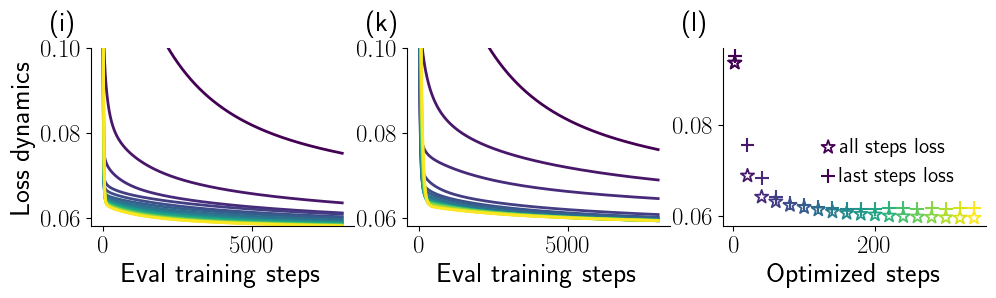

In [98]:
figsize = np.array((7/2*3, 3/5*3.5))*1.1
fontsize = 20
weight_legend_pos = (0.25, 0.6)
subplot_labels = np.array(["(i)", "(k)", "(l)"])

f, ax = plt.subplots(1, 3, figsize=figsize)

ax1 = ax

dynamic_comparison_maml(ax=ax1, maml_pre_processed=pre_processed_maml, maml_pre_processed_2=pre_processed_maml_last_step, 
                        fontsize=fontsize, min_variable_label="1 step MAML", max_variable_label="340 steps MAML", 
                        min_variable=1, max_variable=340, line_width=2, weight_legend_pos = weight_legend_pos, 
                        subplot_labels=subplot_labels, handletextpad=-0.5)
plt.show()

## Computing accuracy of MNIST through time

In [137]:
result_dir = "../results/single_task_more_iters/run_id_4_MNIST_19-01-2023_03-08-40-773"
results = ResultsManager(result_dir)

In [138]:
type(results.results)

dict

In [139]:
W1_base = results.results["W1_t_eq"]
W2_base = results.results["W2_t_eq"]
W1_control = results.results["W1_t_control_opt"]
W2_control = results.results["W2_t_control_opt"]
G1_tilda, G2_tilda = results.results["control_signal"]
G1_tilda, G2_tilda = G1_tilda.cpu().detach().numpy(), G2_tilda.cpu().detach().numpy()
W1_tilda, W2_tilda = G1_tilda * W1_control, G2_tilda * W2_control
mnist_dataset = results.params["dataset_params"]["dataset"]
mnist_dataset.batch_size = 4096

In [140]:
G1_tilda.shape, W1_tilda.shape, W2_base.shape

((16000, 50, 26), (16000, 50, 26), (16000, 2, 50))

In [141]:
x, y = mnist_dataset.sample_batch()
x.shape, y.shape

((4096, 26), (4096, 2))

In [142]:
n_steps = G1_tilda.shape[0]

In [143]:
pred = W2_base[0, ...] @ W1_base[0, ...] @ x.T
pred.shape

(2, 4096)

In [144]:
base_acc = []
control_acc = []
max_steps = 6000
for i in tqdm(range(max_steps)):
    x, y = mnist_dataset.sample_batch(training=False)
    base_pred = np.argmax(W2_base[i, ...] @ W1_base[i, ...] @ x.T, axis=0)
    control_pred = np.argmax(W2_tilda[i, ...] @ W1_tilda[i, ...] @ x.T, axis=0)
    label_id = np.argmax(y, axis=1)
    base_acc.append(accuracy_score(label_id, base_pred))
    control_acc.append(accuracy_score(label_id, control_pred))

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6000/6000 [00:10<00:00, 586.97it/s]


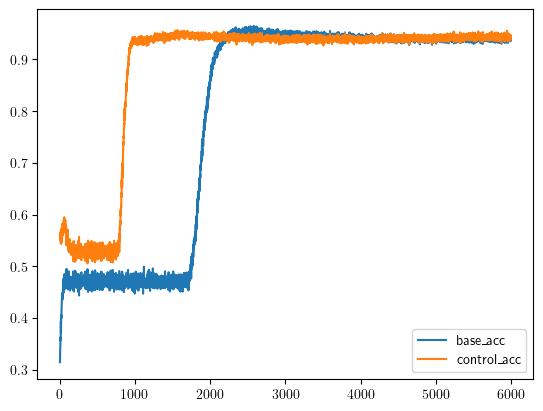

In [145]:
plt.plot(base_acc, label="base_acc")
plt.plot(control_acc, label="control_acc")
plt.legend()
plt.show()

## Average across runs

In [146]:
def get_accuracy_per_run(result_dir):
    results = ResultsManager(result_dir)
    W1_base = results.results["W1_t_eq"]
    W2_base = results.results["W2_t_eq"]
    W1_control = results.results["W1_t_control_opt"]
    W2_control = results.results["W2_t_control_opt"]
    G1_tilda, G2_tilda = results.results["control_signal"]
    G1_tilda, G2_tilda = G1_tilda.cpu().detach().numpy(), G2_tilda.cpu().detach().numpy()
    W1_tilda, W2_tilda = G1_tilda * W1_control, G2_tilda * W2_control
    mnist_dataset = results.params["dataset_params"]["dataset"]
    mnist_dataset.batch_size = 4096
    base_acc = []
    control_acc = []
    max_steps = 6000
    for i in tqdm(range(max_steps)):
        x, y = mnist_dataset.sample_batch(training=False)
        base_pred = np.argmax(W2_base[i, ...] @ W1_base[i, ...] @ x.T, axis=0)
        control_pred = np.argmax(W2_tilda[i, ...] @ W1_tilda[i, ...] @ x.T, axis=0)
        label_id = np.argmax(y, axis=1)
        base_acc.append(accuracy_score(label_id, base_pred))
        control_acc.append(accuracy_score(label_id, control_pred))
    return np.array(base_acc), np.array(control_acc)

In [148]:
mnist_dir_list = glob.glob("../results/single_task_more_iters/run_id_*_MNIST*")
base_acc_runs = []
control_acc_runs = []
for result_dir in mnist_dir_list:
    base_acc, control_acc = get_accuracy_per_run(result_dir)
    base_acc_runs.append(base_acc)
    control_acc_runs.append(control_acc)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6000/6000 [00:07<00:00, 755.53it/s]


In [149]:
base_acc_runs = np.stack(base_acc_runs)
control_acc_runs = np.stack(control_acc_runs)

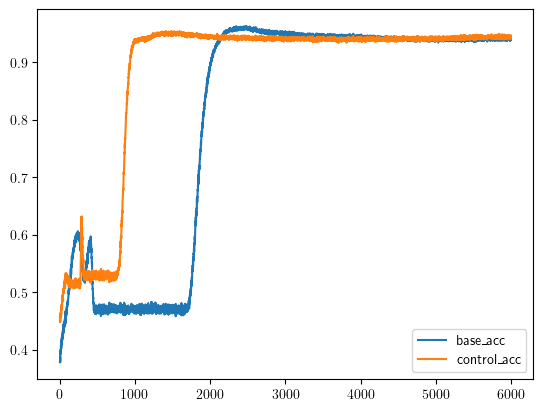

In [150]:
plt.plot(np.mean(base_acc_runs, axis=0), label="base_acc")
plt.plot(np.mean(control_acc_runs, axis=0), label="control_acc")
plt.legend()
plt.show()

In [151]:
pickle.dump({"base_acc": base_acc_runs, "control_acc": control_acc_runs},
           open("accuracy_data.pkl", "wb"),
           protocol=pickle.HIGHEST_PROTOCOL)